<a href="https://colab.research.google.com/github/Ranjan4Kumar/Classify-Medium-Articles-with-Bag-of-Words/blob/main/Classify_Medium_Articles_with_Bag_of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
In this project, we will use the medium-articles dataset from Hugging Face, which is a collection of 
scraped articles containg their title, text and tags
'''
# First, we will install the dataset library, which allows for easy access to dataset on the Hugging Face Hub.



In [5]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [6]:
from huggingface_hub import hf_hub_download
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay)

In [7]:
# Downloading the Dataset of Medium articles from https://huggingface.co/dataset/fabiochiu/medium-articles

df_articles = pd.read_csv(
    hf_hub_download("fabiochiu/medium-articles", repo_type = 'dataset', filename = "medium_articles.csv")
)
df_articles.head()


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [8]:
df_articles.shape

(192368, 6)

In [9]:
# Data Preprocessing

'''
In this small project, we will train a classifier to distinguish wether an article has the "Data Science" tag or not, sc let's add a new 
column " is_data_science " to our dataframe. This classifier will learn based upon the title and the text of the articles, so let's add a full_text column
containing the concatenation of the title and text.
'''


# Create 2 columns:
# -full_text: contains the concatenation of the title and the text of the article.
# -is_data_science: a boolean which is True if the article has the "Data Science" tag

df_articles["is_data_science"] = df_articles["tags"]\
  .apply(lambda tags_list: "Data Science" in tags_list)



In [10]:
df_articles.head()

,title,text,url,authors,timestamp,tags,is_data_science
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",False
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",False
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",False
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",False
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",False


In [19]:
df_articles['is_data_science'].value_counts()

False    184798
True       7570
Name: is_data_science, dtype: int64

In [25]:
df1 = df_articles.loc[df_articles['is_data_science'] == True]
print(df1)

                                                    title  \
85      Essential OpenCV Functions to Get You Started ...   
137                Data Science for Startups: R -> Python   
140     How to Customize QuickSight Dashboards for Use...   
156     The answer is blowing in the wind: Harnessing ...   
157           Working Together to Build a Big Data Future   
...                                                   ...   
190107                Impact values on Valorant Champions   
190749  Congress and the Presidential Election: the Po...   
191108             Sharing our data, Improving our cities   
191117     My experience at the MLconf San Francisco 2018   
191718                    How is Hotel’s price in Berlin?   

                                                     text  \
85      Reading, writing and displaying images\n\nBefo...   
137     Source: Yuri_B at pixabay.com\n\nOne of the pi...   
140     We have been getting a lot of queries on how t...   
156     By Glenn Fung, 

In [26]:
df_articles['full_text'] = df_articles['title']+''+ df_articles['text']
df_articles.head()

,title,text,url,authors,timestamp,tags,is_data_science,full_text
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",False,Mental Note Vol. 24Photo by Josh Riemer on Uns...
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",False,Your Brain On CoronavirusYour Brain On Coronav...
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",False,Mind Your NoseMind Your Nose\n\nHow smell trai...
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",False,The 4 Purposes of DreamsPassionate about the s...
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",False,Surviving a Rod Through the HeadYou’ve heard o...


In [27]:
# sample 1000 articles is_data_science = True and 1000 articles with is_data_science = False

df = pd.concat([
    df_articles[df_articles['is_data_science']].sample(n=1000),
    df_articles[~df_articles["is_data_science"]].sample(n=1000)
])

In [29]:
'''
Last, let's split the dataframe into a train set and a test set using the train_test_split function.Notice that we are passing the labels to the startify arguments
so that the distribution of the labels in the train and test sets will approximately be the same. Read about 
'''
# train/test split
X = df[['full_text']]
y = df['is_data_science']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)


In [30]:
# Model Training
'''
We are now ready to fit the countvectorizer on the training set and then train our LogisticRegression. Model is fitted to avoid dataleakage
'''

vectorizer = CountVectorizer(ngram_range = (1,1))
full_text_vectorized = vectorizer.fit_transform(X_train['full_text'])
model = LogisticRegression()
model.fit(full_text_vectorized, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Now vectorize the test data as well and compute the predictions.
# vectorize test set and predict
full_text_vectorized = vectorizer.transform(X_test["full_text"])
predictions = model.predict(full_text_vectorized)

In [32]:
# The classfication_report function prints the results of several classification metrics on the test set, such as precision, recall, and f1-score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.87      0.90      0.89       200
        True       0.90      0.87      0.88       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.88       400



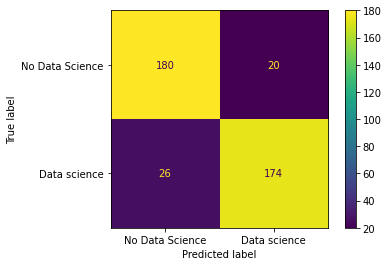

In [33]:
# The confusion_matrix function builds an array-shaped representation of the confusion matrix over the test set. The confusionMatrixDisplay the plots this confusion matrix using the graph library matplotlib

cm = confusion_matrix(y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Data Science","Data science"])
p=disp.plot()
fig = p.figure_
fig.set_facecolor('white')

In [34]:
'''
Last, to get some insight on what the model has learned, let’s show the top 20 words with the highest weights from the LogisticRegression model, 
i.e. the words whose presence contributes the most to a True prediction of is_data_science.
'''
# show top 20 ngrams by logistic regression weight
ngram_indices_sorted = sorted(list(vectorizer.vocabulary_.items()), key=lambda t: t[1])
ngram_sorted = list(zip(*ngram_indices_sorted))[0]
ngram_weight_pairs = list(zip(ngram_sorted, model.coef_[0]))
ngram_weight_pairs_sorted = sorted(ngram_weight_pairs, key=lambda t: t[1], reverse=True)
ngram_weight_pairs_sorted[:20]

[('science', 0.7804915539469083),
 ('data', 0.603493679650344),
 ('picks', 0.588231418193708),
 ('missed', 0.5704172400727111),
 ('21learn', 0.48375205960112955),
 ('metadatos', 0.48375205960112955),
 ('píldoras', 0.48375205960112955),
 ('receta', 0.48375205960112955),
 ('python', 0.4566915867892973),
 ('analysis', 0.43312772694438817),
 ('text', 0.43090611635478676),
 ('latest', 0.4141766854381151),
 ('learning', 0.39086554769799436),
 ('list', 0.35065061187692986),
 ('models', 0.3503711738851208),
 ('case', 0.34830084790055743),
 ('scientists', 0.3336830447926187),
 ('increase', 0.3114078694934907),
 ('charts', 0.3112491192714773),
 ('look', 0.3037560873259449)]